<a href="https://colab.research.google.com/github/Dhruvmalik06/Codersclub/blob/main/SMS_SPAM_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd

df = pd.read_csv("spam.csv", encoding="latin-1")

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3386,ham,So u workin overtime nigpun?,NaN,NaN,NaN
2219,spam,You have WON a guaranteed å£1000 cash or a å£2...,NaN,NaN,NaN
3926,ham,Lol ... I really need to remember to eat when ...,NaN,NaN,NaN
4855,ham,yes baby! I need to stretch open your pussy!,NaN,NaN,NaN
1710,ham,"(No promises on when though, haven't even gott...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 0, inplace = True)

In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)
df.sample(5)

,target,text
1105,ham,on hen night. Going with a swing
351,ham,If you're not in my car in an hour and a half ...
464,ham,Ok i am on the way to railway
1749,ham,DO NOT B LATE LOVE MUM
1078,ham,Convey my regards to him


In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()

In [ ]:
df['target'] = Encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

,0
target,0
text,0


In [ ]:
df.duplicated().sum()

np.int64(403)

In [ ]:
df = df.drop_duplicates(keep='last')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


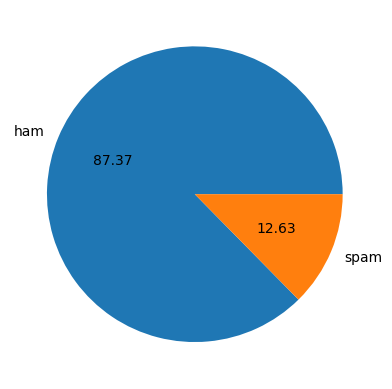

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['characters'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

df['words'] = df['text'].apply(
    lambda x: len(nltk.word_tokenize(str(x)))
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
df.head()

,target,text,characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

df['sentences'] = df['text'].apply(
    lambda x: len(nltk.sent_tokenize(str(x)))
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
df.head()

,target,text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4


In [ ]:
df[['characters','words','sentences']].describe()

,characters,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 0][['characters','words','sentences']].describe() ## for hams

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 1][['characters','words','sentences']].describe() ##for spam

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='characters', ylabel='Count'>

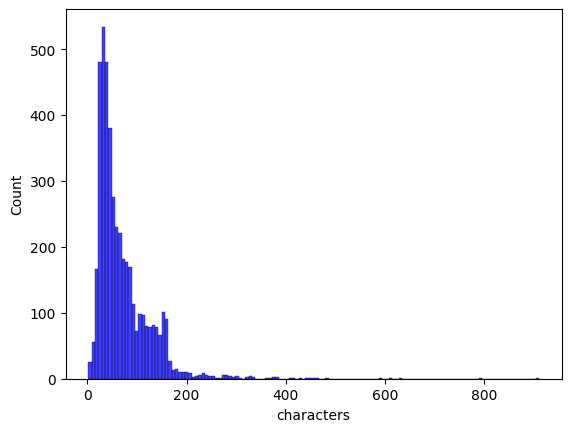

In [ ]:
import seaborn as sns
sns.histplot(df[df['target'] == 0]['characters'],color='blue')

<Axes: xlabel='characters', ylabel='Count'>

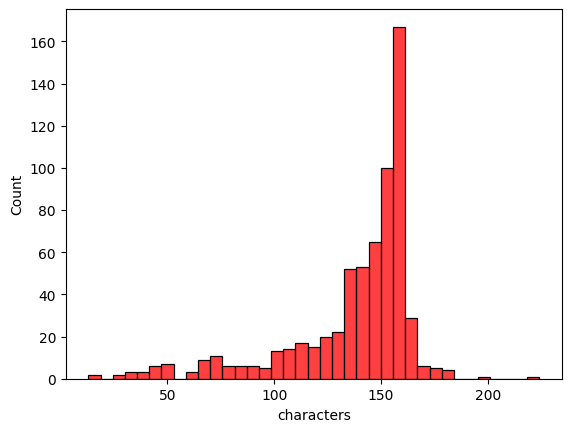

In [ ]:
sns.histplot(df[df['target'] == 1]['characters'],color='red')

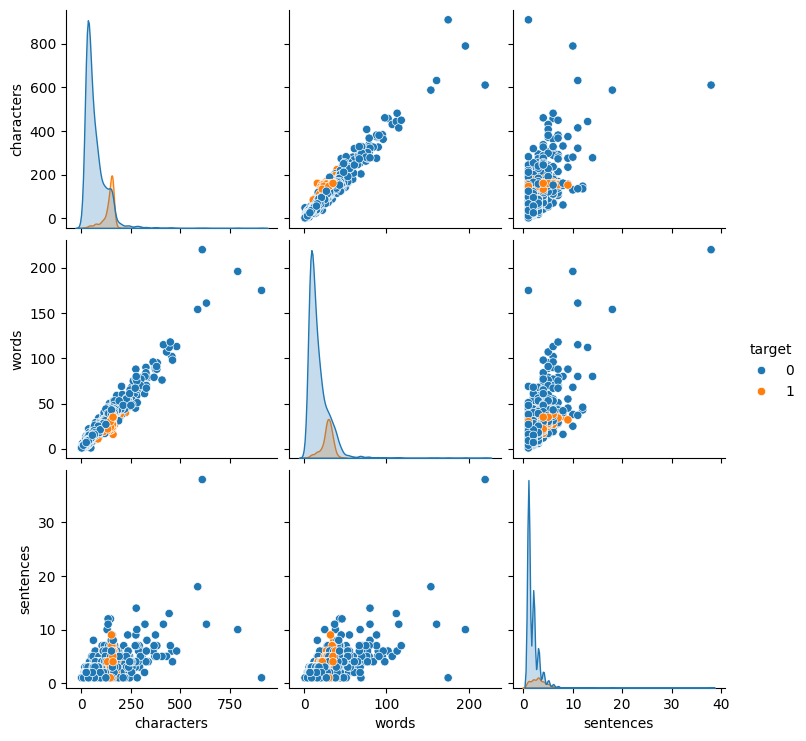

In [ ]:
sns.pairplot(df, hue='target')

<Axes: >

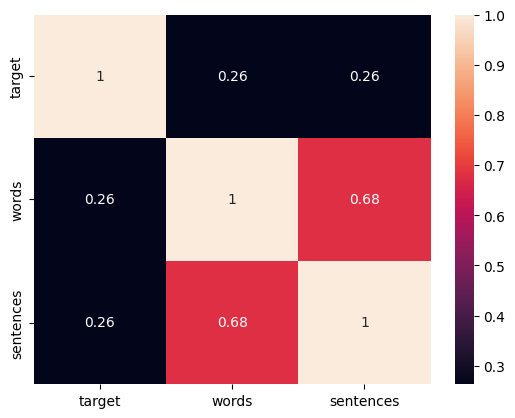

In [ ]:
sns.heatmap(
    df[['target', 'words', 'sentences']].corr(),
    annot=True
)

<Axes: >

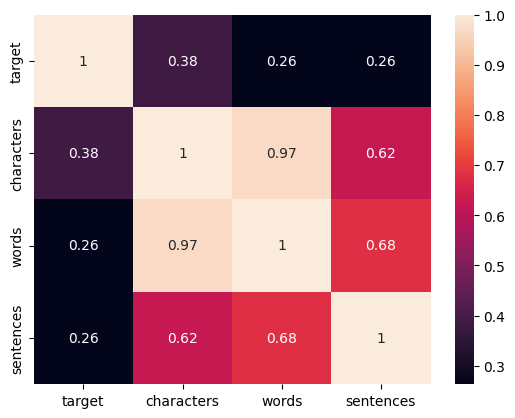

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [ ]:
import nltk
import string
from nltk.corpus import stopwords

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []

    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
ps = PorterStemmer()
ps.stem('Requesting')

'request'

In [ ]:
transform_text("I loved the YT lectures on Machine Learning. HOWs about You")

'love yt lectur machin learn how'

In [ ]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head()


,target,text,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=5000,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

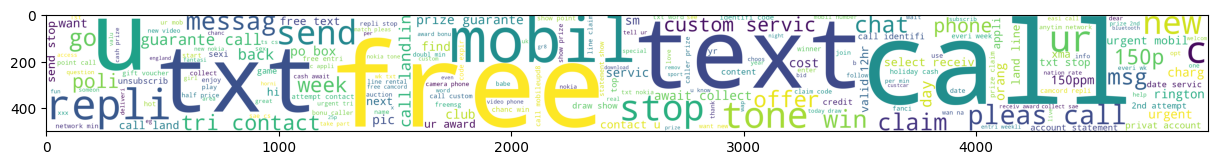

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

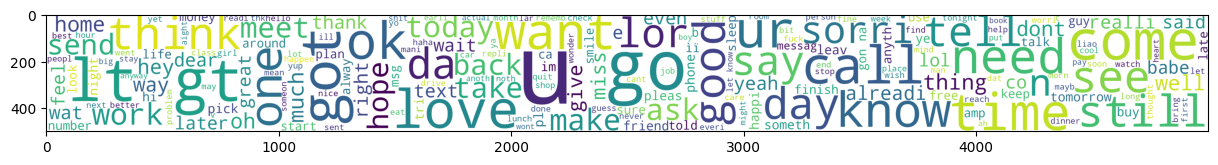

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

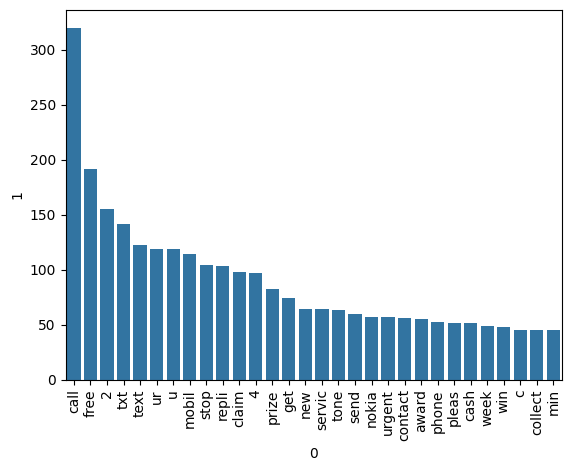

In [ ]:
from collections import Counter
sns.barplot(
    x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
    y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

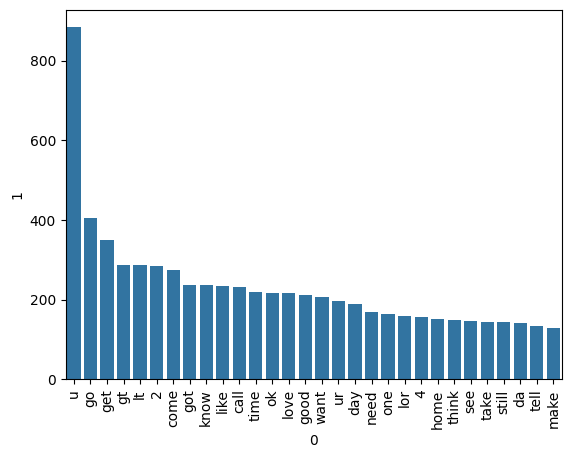

In [ ]:
from collections import Counter
sns.barplot(
    x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
    y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1]
)
plt.xticks(rotation='vertical')
plt.show()

BY USING THE NAIVE BAYES MODEL

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape


(5169, 3000)

In [ ]:
y = df['target'].values

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test,y_pred1))


0.8665377176015474
[[795 118]
 [ 20 101]]
0.4611872146118721


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test,y_pred2))

0.9758220502901354
[[912   1]
 [ 24  97]]
0.9897959183673469


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test,y_pred3))

0.9825918762088974
[[910   3]
 [ 15 106]]
0.9724770642201835


In [ ]:
!pip install xgboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc  = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}


In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)


    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9444444444444444)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    print("For",name)
    print("Accuracy - ", current_accuracy)
    print("presicion -", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9758220502901354
presicion - 0.9444444444444444
For KN
Accuracy -  0.9187620889748549
presicion - 1.0
For NB
Accuracy -  0.9758220502901354
presicion - 0.9897959183673469
For DT
Accuracy -  0.9439071566731141
presicion - 0.8058252427184466
For LR
Accuracy -  0.9564796905222437
presicion - 0.9130434782608695
For RF
Accuracy -  0.9758220502901354
presicion - 0.9705882352941176
For AdaBoost
Accuracy -  0.937137330754352
presicion - 0.8111111111111111
For Bgc
Accuracy -  0.9584139264990329
presicion - 0.8145161290322581
For ETC
Accuracy -  0.97678916827853
presicion - 0.9619047619047619
For GBDT
Accuracy -  0.9574468085106383
presicion - 0.9139784946236559
For xgb
Accuracy -  0.9700193423597679
presicion - 0.9166666666666666


In [ ]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision':precision_scores}).sort_values('Accuracy', ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.976789,0.961905
2,NB,0.975822,0.989796
0,SVC,0.975822,0.944444
5,RF,0.975822,0.970588
10,xgb,0.970019,0.916667
7,Bgc,0.958414,0.814516
9,GBDT,0.957447,0.913978
4,LR,0.956480,0.913043
3,DT,0.943907,0.805825
6,AdaBoost,0.937137,0.811111


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.976789
1,NB,Accuracy,0.975822
2,SVC,Accuracy,0.975822
3,RF,Accuracy,0.975822
4,xgb,Accuracy,0.970019
5,Bgc,Accuracy,0.958414
6,GBDT,Accuracy,0.957447
7,LR,Accuracy,0.956480
8,DT,Accuracy,0.943907
9,AdaBoost,Accuracy,0.937137


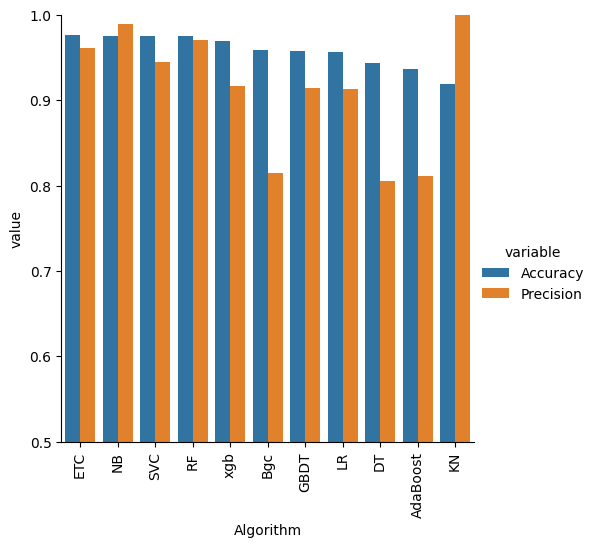

In [ ]:
sns.catplot(x = 'Algorithm', y='value',hue = 'variable', data = performance_df1, kind='bar',height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

NameError: name 'tfidf' is not defined